In [20]:
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,SpatialDropout2D
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
import tensorflow as tf
import numpy as np

# Importing CIFAR 10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# train split to validation
x_train1, x_valid, y_train1, y_valid = train_test_split(x_train, y_train, test_size=0.2)

train_x = x_train1.astype('float32') / 255 
valid_x = x_valid.astype('float32') / 255
test_x = x_test.astype('float32') / 255

print(y_train1.shape)

N = 10

# One-hot encoding
train_y = to_categorical(y_train1, N)
valid_y = to_categorical(y_valid, N)
test_y = to_categorical(y_test, N)
print(train_y.shape)
print(train_x.shape)
print(valid_x.shape)
print(test_x.shape)

(40000, 1)
(40000, 10)
(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [14]:
def Model():
  
    Alex_model = Sequential()
    
    Alex_model.add(Conv2D(64, kernel_size=(5,5), strides = 1, padding='same', activation='relu', input_shape=(32, 32, 3))) # 1st Layer
    #Alex_model.add(SpatialDropout2D(rate=0.1))
    Alex_model.add(MaxPooling2D(pool_size=(2,2),  strides = 2, padding='same'))
    
    Alex_model.add(Conv2D(192, kernel_size=(5,5), strides = 1, padding='same', activation='relu'))       # 2nd Layer
    #Alex_model.add(SpatialDropout2D(rate=0.1))
    Alex_model.add(MaxPooling2D(pool_size=(2,2),  strides = 2))
    
    Alex_model.add(Conv2D(384, kernel_size=(3,3), strides = 1, padding='same', activation='relu'))       # 3rd Layer
    #Alex_model.add(SpatialDropout2D(rate=0.1))
    Alex_model.add(MaxPooling2D(pool_size=(2,2),  strides = 2))
    
    Alex_model.add(Conv2D(256, kernel_size=(5,5), strides = 1, padding='same', activation='relu'))       # 4th Layer
    #Alex_model.add(SpatialDropout2D(rate=0.1))
    Alex_model.add(MaxPooling2D(pool_size=(2,2),  strides = 2))
    
    Alex_model.add(Conv2D(256, kernel_size=(5,5), strides = 1, padding='same', activation='relu'))       # 5th Layer
    #Alex_model.add(SpatialDropout2D(rate=0.1))
    Alex_model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
    
    Alex_model.add(Flatten())
    
    Alex_model.add(Dense(4096, activation='relu'))                     # 6th Layer
    #Alex_model.add(Dropout(rate=0.5))
    
    Alex_model.add(Dense(4096, activation='relu'))                     # 7th Layer
    #Alex_model.add(Dropout(rate=0.5))
    
    Alex_model.add(Dense(10,activation='softmax'))                     # 8th Layer
    return Alex_model


Alex_model = Model()
Alex_model.compile(loss='categorical_crossentropy',
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=['accuracy'])
Alex_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 192)       307392    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 192)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 384)         663936    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 384)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 4, 4, 256)        

In [15]:
# verbose = progress bar setting
history = Alex_model.fit(train_x, train_y, batch_size=128, epochs=50, verbose=1, validation_data=(valid_x, valid_y))
score = Alex_model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
313/313 [==============================] - 9s 28ms/step - loss: 2.0218 - accuracy: 0.2046 - val_loss: 1.4571 - val_accuracy: 0.4452
Epoch 2/50
313/313 [==============================] - 8s 27ms/step - loss: 1.3350 - accuracy: 0.5080 - val_loss: 1.0998 - val_accuracy: 0.6039
Epoch 3/50
313/313 [==============================] - 9s 27ms/step - loss: 1.0255 - accuracy: 0.6304 - val_loss: 1.0223 - val_accuracy: 0.6353
Epoch 4/50
313/313 [==============================] - 8s 27ms/step - loss: 0.8483 - accuracy: 0.7019 - val_loss: 0.9266 - val_accuracy: 0.6749
Epoch 5/50
313/313 [==============================] - 8s 27ms/step - loss: 0.6953 - accuracy: 0.7559 - val_loss: 0.8786 - val_accuracy: 0.6976
Epoch 6/50
313/313 [==============================] - 8s 27ms/step - loss: 0.5463 - accuracy: 0.8108 - val_loss: 0.8985 - val_accuracy: 0.7074
Epoch 7/50
313/313 [==============================] - 8s 27ms/step - loss: 0.4302 - accuracy: 0.8526 - val_loss: 0.9485 - val_accuracy: 0.6997

In [18]:
score = Alex_model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.19406795501709
Test accuracy: 0.7163000106811523


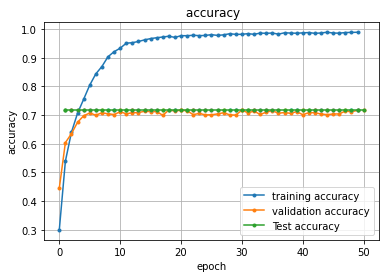

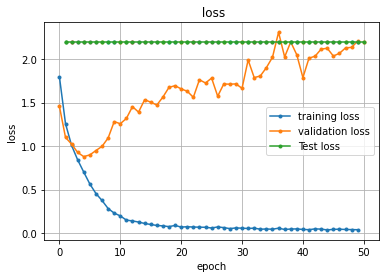

In [31]:
test_accuracy=np.array([np.ones((50))*score[1]])
test_loss=np.array([np.ones((50))*score[0]])
epoch=np.array([np.linspace(1,50,50)])


# Accuracy plots
plt.plot(history.history['accuracy'], marker='.', label='training accuracy')
plt.plot(history.history['val_accuracy'], marker='.', label='validation accuracy')
plt.plot(epoch,test_accuracy, marker='.')
plt.plot(epoch[0],test_accuracy[0], marker='.', label='Test accuracy')
plt.title(' accuracy')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.savefig('Task1_accuracy.jpeg')
plt.show()

# Loss plots
plt.plot(history.history['loss'], marker='.', label='training loss')
plt.plot(history.history['val_loss'], marker='.', label='validation loss')
plt.plot(epoch,test_loss, marker='.')
plt.plot(epoch[0],test_loss[0], marker='.',label='Test loss')
plt.title(' loss')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.savefig('Task1_loss.jpeg')
plt.show()